In [2]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 221.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 594.5 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 740.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 393.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 219.0 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 266.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 325.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 1.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
data = pd.read_csv("./GlobalLandTemperaturesByCity.csv", parse_dates=["dt"])

In [3]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [6]:
data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [8]:
data.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty
count,8599212,8.235082e+06,8.235082e+06
mean,1907-10-21 07:06:00.828411904,1.672743e+01,1.028575e+00
min,1743-11-01 00:00:00,-4.270400e+01,3.400000e-02
25%,1860-06-01 00:00:00,1.029900e+01,3.370000e-01
50%,1911-09-01 00:00:00,1.883100e+01,5.910000e-01
75%,1962-09-01 00:00:00,2.521000e+01,1.349000e+00
max,2013-09-01 00:00:00,3.965100e+01,1.539600e+01
std,NaN,1.035344e+01,1.129733e+00


In [11]:
# data.to_pickle("data.pickle")  #pickle, parquet vb ..

In [12]:
data.shape

(8599212, 7)

In [32]:
data.isna().sum() # False/True değerler oluşucak ve boşluk olan değerlerin çıktısı alınıcak.

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [17]:
data.isna().sum() / data.shape[0] * 100

dt                               0.000000
AverageTemperature               4.234458
AverageTemperatureUncertainty    4.234458
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [4]:
data_non_null = data.dropna() # null olan satırları çıkar

In [42]:
data.dropna(inplace=True) 
"""
axis = 1 -> kolonu siler
how = "all|any" -> all = kolon full null ise siler
                   any = satır null olan değer varsa siler
thresh = eşik değeri verir ve uygun ise kod çalışır.
inplace = True -> Null değerlerini taşıyan satırları çıkartır.
"""

'\naxis = 1 -> kolonu siler\nhow = "all|any" -> all = kolon full null ise siler\n                   any = satır null olan değer varsa siler\nthresh = eşik değeri verir ve uygun ise kod çalışır.\ninplace = True -> Null değerlerini taşıyan satırları çıkartır.\n'

In [41]:
# data.shape
# data.isna().sum()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [22]:
data.shape

(8599212, 7)

In [11]:
type(data_non_null[["Country"]]) # ilk [""] -> Series || [[""]] -> DataFrame
data_non_null[["City", "Country"]]

,City,Country
0,Århus,Denmark
5,Århus,Denmark
6,Århus,Denmark
7,Århus,Denmark
8,Århus,Denmark
...,...,...
8599206,Zwolle,Netherlands
8599207,Zwolle,Netherlands
8599208,Zwolle,Netherlands
8599209,Zwolle,Netherlands


In [12]:
data_non_null["Country"].value_counts() # O kolondokileri gruplar

Country
India               960548
China               819132
United States       661524
Brazil              451645
Russia              448663
                     ...  
Burundi               1675
Eritrea               1669
Djibouti              1658
Oman                  1652
Papua New Guinea      1580
Name: count, Length: 159, dtype: int64

In [13]:
data_non_null["Country"].value_counts().shape

(159,)

In [17]:
data_non_null[(data_non_null["Country"] == "Japan") | (data_non_null["Country"] == "Germany")]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
17482,1743-11-01,6.425,1.628,Aachen,Germany,50.63N,6.34E
17487,1744-04-01,8.599,2.485,Aachen,Germany,50.63N,6.34E
17488,1744-05-01,11.699,1.330,Aachen,Germany,50.63N,6.34E
17489,1744-06-01,14.839,1.382,Aachen,Germany,50.63N,6.34E
17490,1744-07-01,16.390,1.529,Aachen,Germany,50.63N,6.34E
...,...,...,...,...,...,...,...
8480046,2013-04-01,11.310,0.493,Zama,Japan,36.17N,139.23E
8480047,2013-05-01,16.757,0.396,Zama,Japan,36.17N,139.23E
8480048,2013-06-01,20.927,0.489,Zama,Japan,36.17N,139.23E
8480049,2013-07-01,24.645,0.404,Zama,Japan,36.17N,139.23E


In [18]:
data_non_null[(data_non_null["Country"] == "Japan") & (data_non_null["AverageTemperature"] > 20 )]


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
45536,1845-07-01,23.979,1.876,Abiko,Japan,36.17N,139.23E
45537,1845-08-01,24.109,1.376,Abiko,Japan,36.17N,139.23E
45548,1846-07-01,23.845,1.969,Abiko,Japan,36.17N,139.23E
45549,1846-08-01,24.931,1.540,Abiko,Japan,36.17N,139.23E
45550,1846-09-01,20.703,1.815,Abiko,Japan,36.17N,139.23E
...,...,...,...,...,...,...,...
8480038,2012-08-01,26.681,0.482,Zama,Japan,36.17N,139.23E
8480039,2012-09-01,23.275,0.348,Zama,Japan,36.17N,139.23E
8480048,2013-06-01,20.927,0.489,Zama,Japan,36.17N,139.23E
8480049,2013-07-01,24.645,0.404,Zama,Japan,36.17N,139.23E


In [21]:
data_non_null[data_non_null["Country"].isin(["Japan", "Germany", "Indonesia"])]["Country"].value_counts()

Country
Japan        356467
Indonesia    273295
Germany      256446
Name: count, dtype: int64

In [63]:
data_selected = data_non_null[data_non_null["Country"].isin(["Japan", "Germany", "Indonesia"])]

In [48]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
17482,1743-11-01,6.425,1.628,Aachen,Germany,50.63N,6.34E
17487,1744-04-01,8.599,2.485,Aachen,Germany,50.63N,6.34E
17488,1744-05-01,11.699,1.330,Aachen,Germany,50.63N,6.34E
17489,1744-06-01,14.839,1.382,Aachen,Germany,50.63N,6.34E
17490,1744-07-01,16.390,1.529,Aachen,Germany,50.63N,6.34E


In [30]:
data_selected["Country"].value_counts()

Country
Japan        356467
Indonesia    273295
Germany      256446
Name: count, dtype: int64

In [38]:
 data_selected.groupby(by="Country").agg({"AverageTemperature": "mean"})

,AverageTemperature
Country,
Germany,8.482791
Indonesia,25.990193
Japan,13.402360


In [44]:
 data_selected.groupby(by="Country").agg({"AverageTemperature": "mean"}) # Country'e göre grupla ve  AverageTemperature kolonuna göre ort al.


,AverageTemperature
Country,
Germany,-12.008
Indonesia,22.047
Japan,-13.456


In [54]:
tr_avg_temps = data[data["Country"] == "Japan"]["AverageTemperature"]
gr_avg_temps = data[data["Country"] == "Germany"]["AverageTemperature"]
br_avg_temps = data[data["Country"] == "Brazil"]["AverageTemperature"]

/tmp/ipykernel_9446/2806142122.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr_avg_temps)
/tmp/ipykernel_9446/2806142122.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gr_avg_temps)
/tmp/ipykernel_9446/2806142122.py:3: UserWarning: 

`distplot` is a deprecated function and will be re

<Axes: xlabel='AverageTemperature', ylabel='Density'>

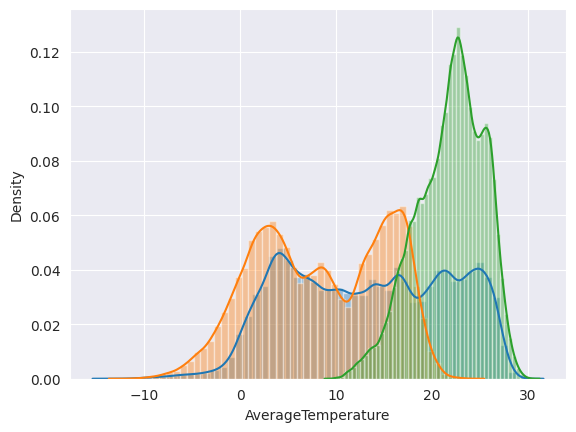

In [55]:
sns.distplot(tr_avg_temps)
sns.distplot(gr_avg_temps)
sns.distplot(br_avg_temps)

In [64]:
# data["Country"].value_counts().index
Countries = data_selected["Country"].unique()

/tmp/ipykernel_9446/3449921806.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["Country"] == country]["AverageTemperature"])
/tmp/ipykernel_9446/3449921806.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["Country"] == country]["AverageTemperature"])
/tmp/ipykernel_944

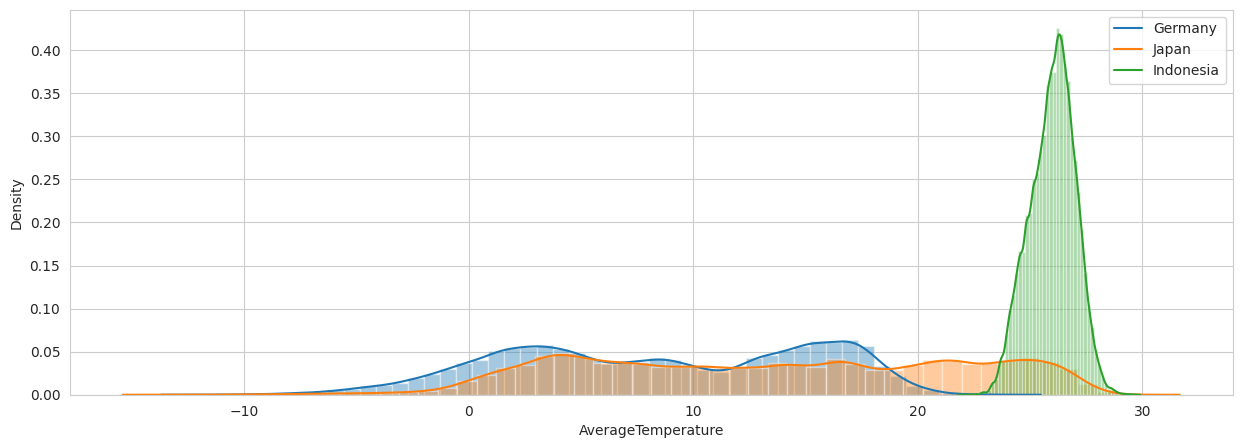

In [68]:
sns.set_style("whitegrid")  # arka plana çizgi ekler
plt.figure(figsize=(15,5))   # grafiğin boyutunu düzenler
for country in Countries:
    sns.distplot(data[data["Country"] == country]["AverageTemperature"])

plt.legend(Countries)  # gelen değerlerin grafikteki hangi renkleri temsil edeceğini gösterir.